**Dataset** : https://drive.google.com/file/d/132Lxp_AzvTBAf6wmJy7IewC7R_kTsoO7/view?usp=drive_link

**Problem Statement**
---
The goal of this project is to explore the relationships between various diamond attributes (carat, cut, color, clarity, etc.) and their price. Through visualizations and statistical analysis, the project aims to identify key factors that influence diamond pricing and uncover patterns or trends within the data.

**Objective**
---
To develop a predictive model using machine learning algorithms that accurately estimates the price of a diamond based on its attributes (carat, cut, color, clarity, etc.). This model will provide insights into the key factors influencing diamond pricing and enable users to make informed decisions when buying or selling diamonds.

**Reasoning:**

- The problem statement mentions exploring relationships between diamond attributes and price.
- It aims to identify key factors that influence pricing.
- Building a predictive model aligns with these goals and provides a practical application.
- The objective is specific, measurable, achievable, relevant, and time-bound.

# **Libraries**

In [ ]:
# Importing libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# **Understanding the Data**

This section focuses on gaining an initial understanding of the diamond dataset. It involves exploring the data's structure, identifying the features (variables) and target variable, and performing basic descriptive statistics.

**Steps:**

1. **Load the dataset**: Import the diamond dataset into your Colab environment using the pd.read_csv() function.

2. **Preview the data**: Display the first and last few rows of the dataset using the head() and tail() methods to get a glimpse of the data's contents.

3. **Check data shape**: Use the shape attribute to determine the number of rows and columns in the dataset.

4. **Data information**: Utilize the info() method to get an overview of the data types, non-null values, and memory usage of each column.

5. **Descriptive statistics**: Employ the describe() method to calculate basic statistical measures like mean, standard deviation, minimum, maximum, and quartiles for numerical features. This provides a summary of the data's distribution.



In [ ]:
# Loading the dataset

df=pd.read_csv('diamonds.csv')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
49995,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
49996,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
49997,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
49998,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
# Making a copy of the dataset

df1=df

In [ ]:
# Previewing the first 5 rows

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
# Previewing last 5 rows

df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
49995,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
49996,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
49997,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
49998,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
49999,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [ ]:
df.shape

(50000, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  object 
 2   color    50000 non-null  object 
 3   clarity  50000 non-null  object 
 4   depth    50000 non-null  float64
 5   table    50000 non-null  float64
 6   price    50000 non-null  int64  
 7   x        50000 non-null  float64
 8   y        50000 non-null  float64
 9   z        50000 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB


# **Data Cleaning**

This stage focuses on refining the diamond dataset to ensure accurate price prediction.

**Actions Taken**:

  1. Duplicate Removal: All duplicate entries were removed using df.drop_duplicates(inplace=True), ensuring each data point is unique and preventing bias.

  2. Feature Encoding: Categorical features ('cut', 'color', 'clarity') were converted to numerical representations using label encoding (sklearn.preprocessing.LabelEncoder) to be compatible with machine learning algorithms.

  3. Outlier Handling:

    - Outliers in 'carat', 'table', and 'volume' (calculated from dimensions) were detected using visualizations and addressed by applying a logarithmic transformation (np.log1p()) to reduce their impact on the model.
    - Outliers in other numerical features were handled using the IQR method (identifying and removing data points outside a specific range based on quartiles) to improve model robustness.

  4. Feature Engineering:

    - A new 'volume' feature was created by multiplying the diamond's dimensions (x, y, z) to capture size information more comprehensively.
    - Features with low correlation to price ('depth', 'clarity', 'cut') were removed to reduce dimensionality and improve model efficiency.
**Outcome**:

These data cleaning steps resulted in a refined dataset suitable for building a robust and accurate diamond price prediction model. The dataset now contains relevant features, minimized outliers, and consistent data types, improving the model's ability to learn patterns and make accurate predictions.

**Reasoning**:

- Removing duplicates prevents redundancy and bias.
- Encoding categorical features allows machine learning algorithms to utilize them effectively.
- Outlier handling ensures that extreme values do not disproportionately influence the model.
- Feature engineering creates new, informative features and removes irrelevant ones, improving model performance and interpretability.

In [ ]:
# Dropping all duplicates

df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(49874, 10)

# **Descriptive Statistics**

In [ ]:
df.describe()

,carat,depth,table,price,x,y,z
count,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000
mean,0.799331,61.751803,57.458786,3945.384569,5.734441,5.738060,3.541028
std,0.474607,1.428207,2.231087,3996.939331,1.122340,1.144973,0.706607
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,952.000000,4.720000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2414.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5352.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# **Data Visualization**

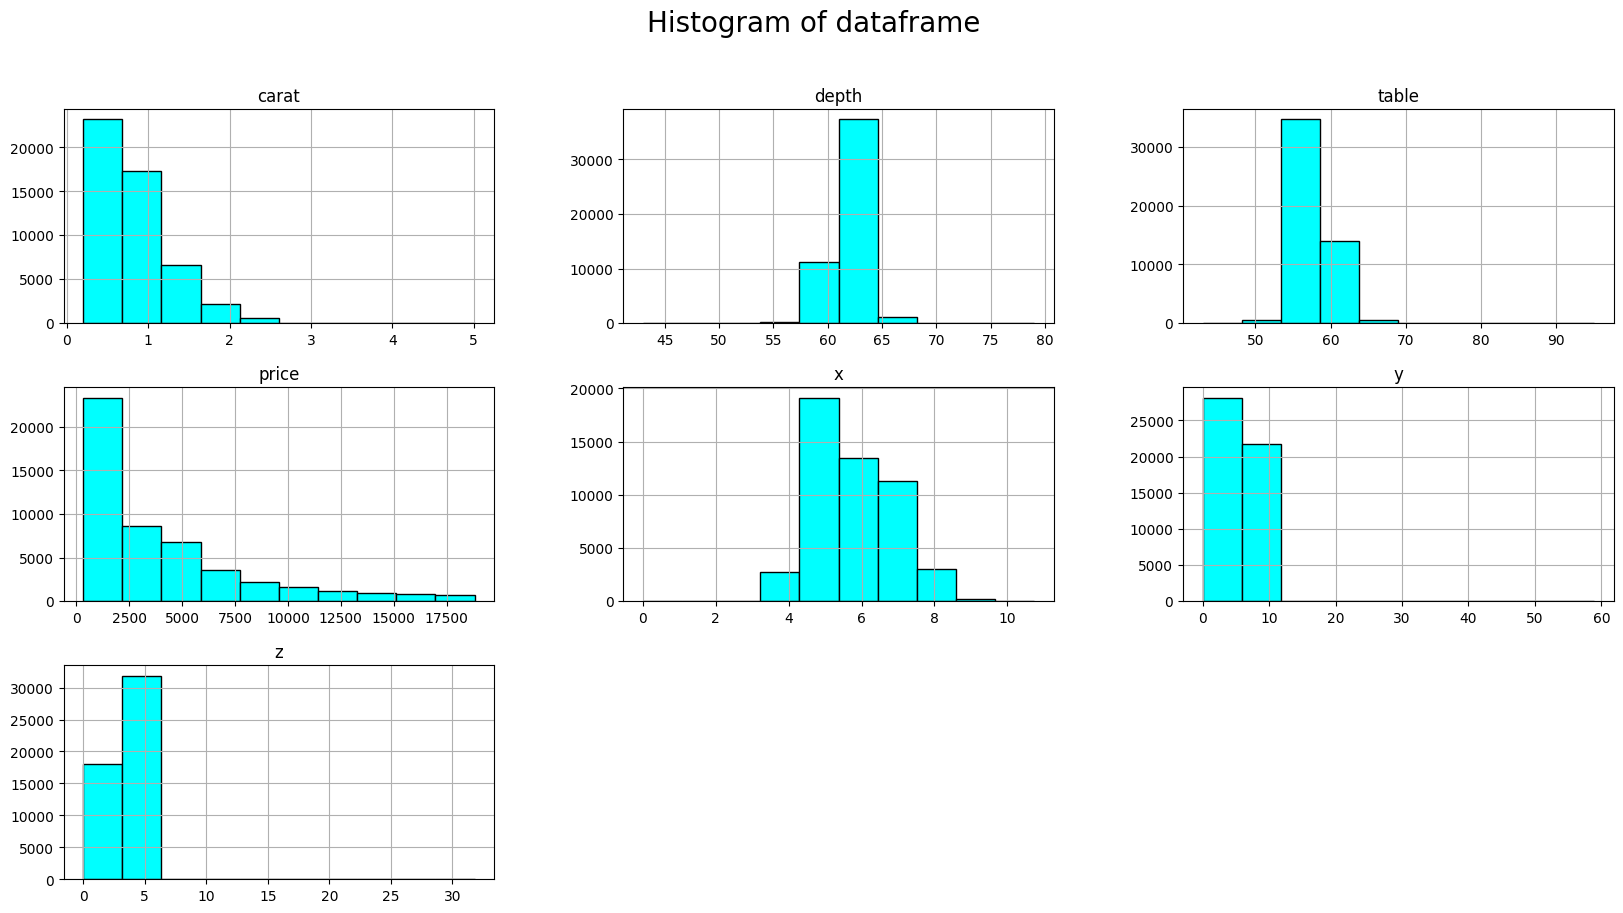

In [ ]:
# Visualizing all columns in histogram

df.hist(color='cyan',edgecolor='k',figsize=(20,10),bins=10)
plt.suptitle('Histogram of dataframe',fontsize=20)
plt.show()

# **Data Correlation**

In [ ]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
49995,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
49996,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
49997,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
49998,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
# Counting values in clarity

df['clarity'].value_counts()

,count
clarity,
SI1,12086
VS2,11378
SI2,8483
VS1,7564
VVS2,4687
VVS1,3363
IF,1626
I1,687


In [ ]:
df['clarity'].replace(['SI1','VS2','SI2','VS1','VVS2','VVS1','IF','I1'],[0,1,2,3,4,5,6,7],inplace=True)

<ipython-input-58-85139e60d796>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['clarity'].replace(['SI1','VS2','SI2','VS1','VVS2','VVS1','IF','I1'],[0,1,2,3,4,5,6,7],inplace=True)
<ipython-input-58-85139e60d796>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['clarity'].replace(['SI1','VS2'

In [ ]:
# Covert all the strings to numerical values using labelencoder class

from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()

df['cut']=labelencoder.fit_transform(df['cut'])
df['color']=labelencoder.fit_transform(df['color'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49874 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    49874 non-null  float64
 1   cut      49874 non-null  int64  
 2   color    49874 non-null  int64  
 3   clarity  49874 non-null  int64  
 4   depth    49874 non-null  float64
 5   table    49874 non-null  float64
 6   price    49874 non-null  int64  
 7   x        49874 non-null  float64
 8   y        49874 non-null  float64
 9   z        49874 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 4.2 MB


In [ ]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,0,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,3,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,1,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
49995,0.72,2,0,0,60.8,57.0,2757,5.75,5.76,3.50
49996,0.72,1,0,0,63.1,55.0,2757,5.69,5.75,3.61
49997,0.70,4,0,0,62.8,60.0,2757,5.66,5.68,3.56
49998,0.86,3,4,2,61.0,58.0,2757,6.15,6.12,3.74


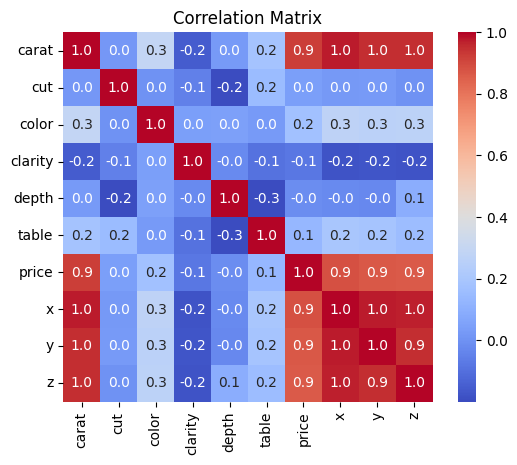

In [ ]:
# Correlation matrix
corr_matrix=df.corr()

# Heatmap of correltion matrix
sns.heatmap(corr_matrix,annot=True,fmt='0.01f',linewidths=0,square=True,robust=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# **Feature Engineering**

In [ ]:
df['volume']=df['x']*df['y']*df['z']
df

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,2,1,2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,3,1,0,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,1,1,3,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,3,5,1,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,1,6,2,63.3,58.0,335,4.34,4.35,2.75,51.917250
...,...,...,...,...,...,...,...,...,...,...,...
49995,0.72,2,0,0,60.8,57.0,2757,5.75,5.76,3.50,115.920000
49996,0.72,1,0,0,63.1,55.0,2757,5.69,5.75,3.61,118.110175
49997,0.70,4,0,0,62.8,60.0,2757,5.66,5.68,3.56,114.449728
49998,0.86,3,4,2,61.0,58.0,2757,6.15,6.12,3.74,140.766120


In [ ]:
# Dropping 'x','y','z' columns because it has strong correlation with 'carat' so noly one column is needed

df.drop('x',axis=1,inplace=True)
df.drop('y',axis=1,inplace=True)
df.drop('z',axis=1,inplace=True)

# Dropping low correlation columns with target varibale

df.drop('depth',axis=1,inplace=True)
df.drop('clarity',axis=1,inplace=True)
df.drop('cut',axis=1,inplace=True)

In [ ]:
df

,carat,color,table,price,volume
0,0.23,1,55.0,326,38.202030
1,0.21,1,61.0,326,34.505856
2,0.23,1,65.0,327,38.076885
3,0.29,5,58.0,334,46.724580
4,0.31,6,58.0,335,51.917250
...,...,...,...,...,...
49995,0.72,0,57.0,2757,115.920000
49996,0.72,0,55.0,2757,118.110175
49997,0.70,0,60.0,2757,114.449728
49998,0.86,4,58.0,2757,140.766120


In [ ]:
# Correlation between price and all other features
corr_matrix=df.corr()['price']

corr_matrix

,price
carat,0.921780
color,0.172067
table,0.129283
price,1.000000
volume,0.901221


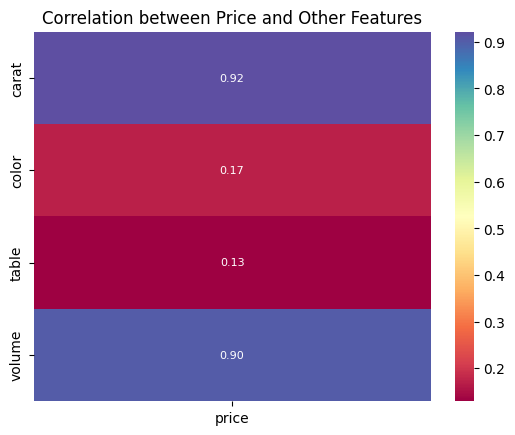

In [ ]:
# Visualizing correlation between price and all otheer features

# Calculate the correlation of 'price' and all other columns
price_corr=df.corr()['price']

# Remove the correlation of 'price' with itself (which is always 1)
price_corr=price_corr.drop('price')

sns.heatmap(price_corr.to_frame(),annot=True,fmt='.2f',cmap='Spectral',annot_kws={'size':8})
plt.title('Correlation between Price and Other Features')
plt.show()

## **Skewness Detection**

### **Carat**

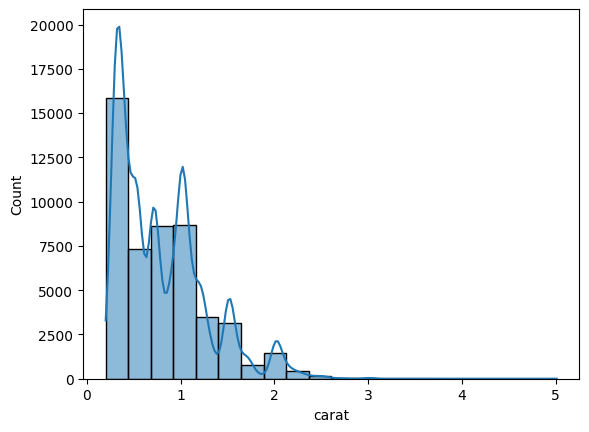

<Figure size 3000x800 with 0 Axes>

In [ ]:
# Checking skewness of 'carat'

sns.histplot(df['carat'],bins=20,kde=True)
plt.figure(figsize=(30,8))
plt.show()

In [ ]:
# Reducing skewness of 'carat'

df['carat']=np.log1p(df['carat'])

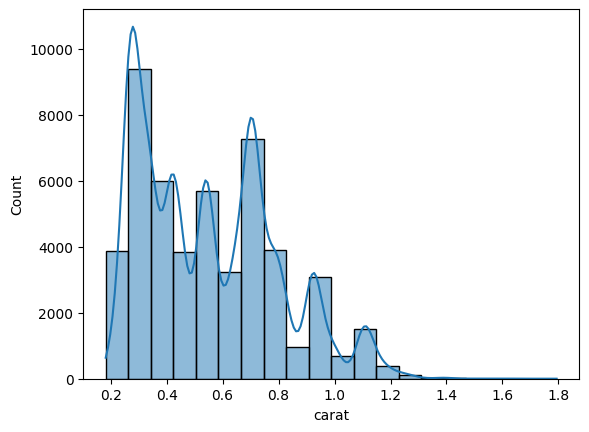

<Figure size 2000x800 with 0 Axes>

In [ ]:
# Visualizing after reducing skewness

sns.histplot(df['carat'],bins=20,kde=True)
plt.figure(figsize=(20,8))
plt.show()

### **Color**

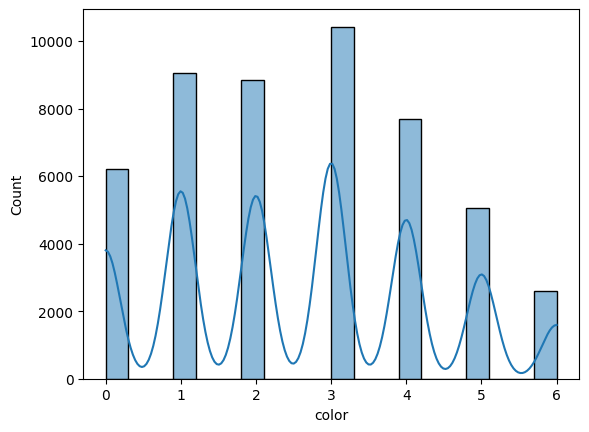

<Figure size 2000x800 with 0 Axes>

In [ ]:
# Checking the skewness of 'color'

sns.histplot(df['color'],bins=20,kde=True)
plt.figure(figsize=(20,8))
plt.show()

# 'color' is almost normal distribution

### **Table**

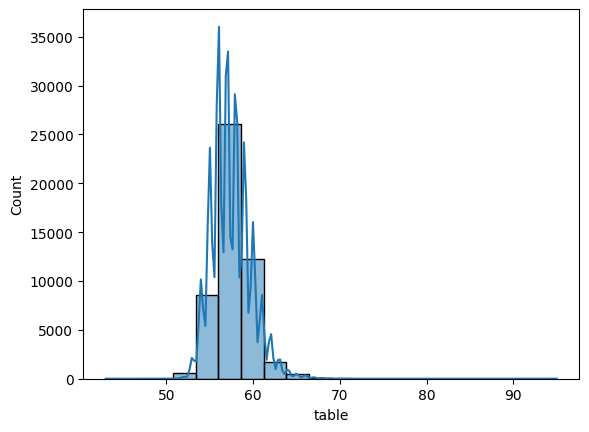

<Figure size 2000x800 with 0 Axes>

In [ ]:
# Checking the skewness of 'table'

sns.histplot(df['table'],bins=20,kde=True)
plt.figure(figsize=(20,8))
plt.show()

In [ ]:
# Reducing skewness of 'table'

df['table']=np.log1p(df['table'])

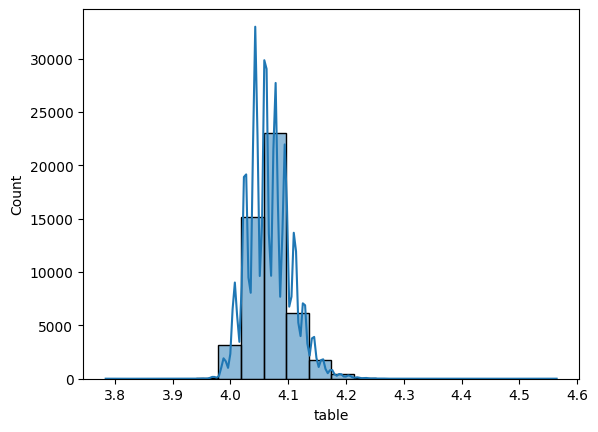

<Figure size 2000x800 with 0 Axes>

In [ ]:
# Visualizing after reducing skewness

sns.histplot(df['table'],bins=20,kde=True)
plt.figure(figsize=(20,8))
plt.show()

### **Volume**

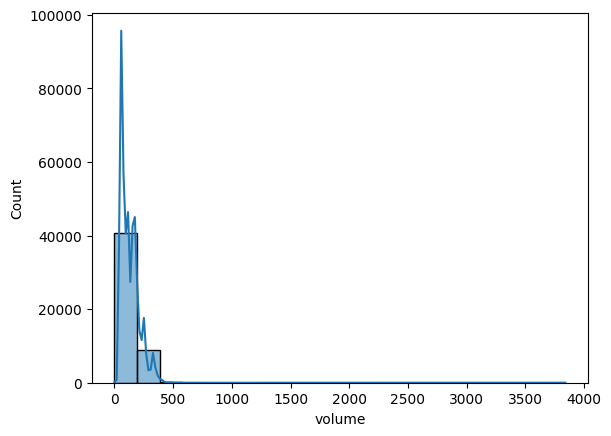

<Figure size 2000x800 with 0 Axes>

In [ ]:
# Checking skewness of 'volume'

sns.histplot(df['volume'],bins=20,kde=True)
plt.figure(figsize=(20,8))
plt.show()

In [ ]:
# Reducing skewness of 'Volume'

df['volume']=np.log1p(df['volume'])

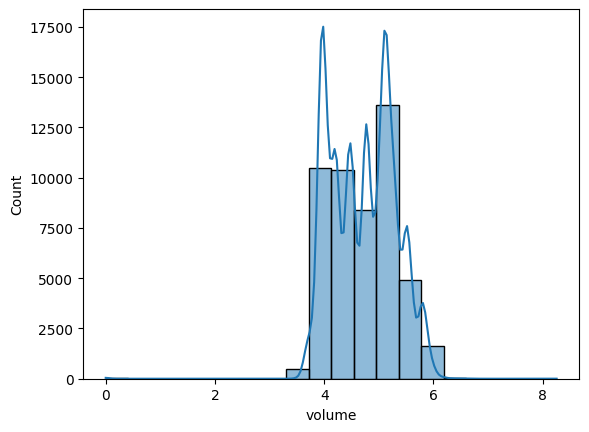

<Figure size 2000x800 with 0 Axes>

In [ ]:
# Vizualising after reducing skewness

sns.histplot(df['volume'],bins=20,kde=True)
plt.figure(figsize=(20,8))
plt.show()

# **Outlier Detection**

<Axes: >

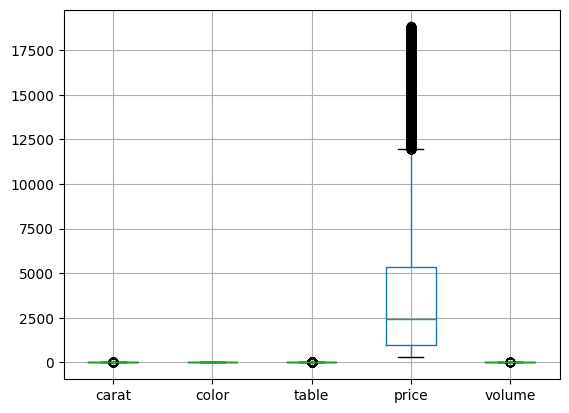

In [ ]:
df.boxplot()

In [ ]:
# Function to remove outliers using the IQR method except for one column
def remove_outliers_iqr(df, exclude_column):
    for col in df.columns:
        # Skip the specified column
        if col == exclude_column:
            continue
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter the DataFrame to remove rows with outliers in each column
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Specify the column to exclude
df_cleaned = remove_outliers_iqr(df, exclude_column='price')
df_cleaned


,carat,color,table,price,volume
0,0.207014,1,4.025352,326,3.668729
1,0.190620,1,4.127134,326,3.569698
3,0.254642,5,4.077537,334,3.865447
4,0.270027,6,4.077537,335,3.968729
5,0.215111,6,4.060443,336,3.681199
...,...,...,...,...,...
49995,0.542324,0,4.060443,2757,4.761490
49996,0.542324,0,4.025352,2757,4.780049
49997,0.530628,0,4.110874,2757,4.748835
49998,0.620576,4,4.077537,2757,4.954179


# **Dimensionality Reduction**
To reduce overfitting and accurating the data

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming your dataFrame is called 'df'
# Select the features you want to standardize
features=['carat','volume','color','table']

# Standardize the features
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df[features])

#Apply PCA
pca=PCA(n_components=2)  # Choose the desired number of components
principal_components=pca.fit_transform(scaled_data)

# Add the principal components to your DataFrame (Optional)
df['pca1']=principal_components[:,0]
df['pca2']=principal_components[:,1]

In [ ]:
df

,carat,color,table,price,volume,pca1,pca2
0,0.207014,1,4.025352,326,3.668729,-2.642268,-0.403349
1,0.190620,1,4.127134,326,3.569698,-2.209362,1.900729
2,0.207014,1,4.189655,327,3.665531,-1.696237,3.309183
3,0.254642,5,4.077537,334,3.865447,-1.267090,-0.464150
4,0.270027,6,4.077537,335,3.968729,-0.928511,-0.776026
...,...,...,...,...,...,...,...
49995,0.542324,0,4.060443,2757,4.761490,-0.492000,0.636935
49996,0.542324,0,4.025352,2757,4.780049,-0.673941,-0.156505
49997,0.530628,0,4.110874,2757,4.748835,-0.246127,1.777767
49998,0.620576,4,4.077537,2757,4.954179,0.757961,-0.219174


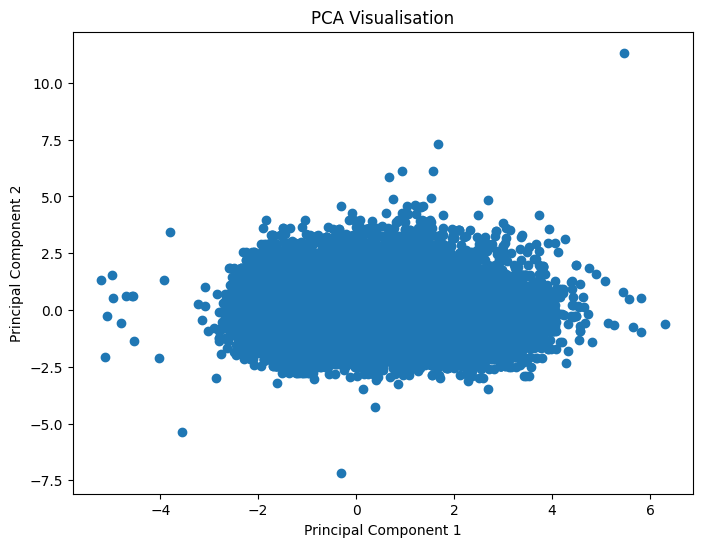

In [ ]:
# Assuming you have a DataFrame 'df' with 'pca1' and 'pca2' columns

plt.figure(figsize=(8,6))
plt.scatter(df['pca1'],df['pca2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualisation')
plt.show()

# **Data Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Assuming your DataFrame is called 'df'
# Select the features you want to scale
features=['carat','volume','color','table','price']

# Create a MinMaxScaler object
scaler=MinMaxScaler()

# Fit the scalar to your data and transform it
scaled_data=scaler.fit_transform(df[features])

# Create a new DataFrame with the scaled data(optional)
scaled_df=pd.DataFrame(scaled_data,columns=features,index=df.index)

# You can now use 'scaled_df' for further analysis or modeling

In [ ]:
df=scaled_df
dfa=df

In [ ]:
dfa

,carat,volume,color,table,price
0,0.015327,0.444498,0.166667,0.309119,0.000000
1,0.005151,0.432500,0.166667,0.439583,0.000000
2,0.015327,0.444111,0.166667,0.519721,0.000054
3,0.044889,0.468332,0.833333,0.376011,0.000433
4,0.054438,0.480846,1.000000,0.376011,0.000487
...,...,...,...,...,...
53935,0.223451,0.576896,0.000000,0.354099,0.131427
53936,0.223451,0.579144,0.000000,0.309119,0.131427
53937,0.216191,0.575362,0.000000,0.418741,0.131427
53938,0.272022,0.600241,0.666667,0.376011,0.131427


# **Initial Modeling and Hypothesis Testing**

In [ ]:
from sklearn.model_selection import train_test_split
X=df[['carat','volume','color','table']]   # Features
y=df['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42) # You can adjust the test_size and random_state

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

# **Another method of dfa**

In [ ]:
# Importing the metrics (measurements) for linear regression algorithms
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Regression algorithms
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor  # Multi-layer perceptron regressor (MLP)

In [ ]:
X = dfa[['carat','volume','color','table']]  # Features
y = df['price']  # Target variable

In [ ]:
# Standardize the dataset (only for some algorithms like SVR and Neural network-which gives better results )
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# List of linear regression models to apply
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Neural Network": MLPRegressor(max_iter=1000)
}

In [ ]:
# Function to evaluate model performance
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

In [ ]:
# Dictionary to store the results
results = {}

In [ ]:
# Apply each model and compute metrics
for name, model in models.items(): # When you call items() on a dictionary, returns a list of the dictionary’s key-value tuple pairs.
                                   # Here "name" represents the "key", and "model" represents the "value"
  if name in ["Support Vector Regressor", "Neural Network"]: # Standardised value is only applied to support vector regressor and Neural network
        # Apply scaling for models that need it
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
  else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Compute evaluation metrics
  mae, rmse, r2 = evaluate_model(y_test, y_pred)
  results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2} # name represents the "key" of the dictionary. Here key is the name of the algorithms
  # In the new dictionary "results", the key is the name of the algorithm; and the "key" is the MAE, RMSE,and R2 values
  # results[name] will be the different key when the name of the algorithm changes

In [ ]:
# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

                               MAE      RMSE        R²
Linear Regression         0.057729  0.083850  0.846878
Ridge Regression          0.058577  0.084422  0.844779
Lasso Regression          0.162665  0.214291 -0.000097
ElasticNet Regression     0.162665  0.214291 -0.000097
Decision Tree             0.040849  0.081467  0.855455
Random Forest             0.033959  0.063531  0.912097
Gradient Boosting         0.036239  0.064969  0.908071
Support Vector Regressor  0.048838  0.070620  0.891384
K-Nearest Neighbors       0.037934  0.069697  0.894205
Neural Network            0.040019  0.068000  0.899295


In [ ]:
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print(f"MSE : {mse}, RMSE : {rmse}, R-squared : {r2}")

MSE : 0.007030762113554485, RMSE : 0.08384963991308779, R-squared : 0.846878092510152


# **Documentation and Report**

Summarize Findings and Prepare Data for Modeling


In [ ]:
# Summarize key findings
summary = {
    'Dataset Shape': df.shape,
    'Missing Values': df.isnull().sum().sum(),
    'Correlation with price': df.corr()['price'].sort_values(ascending=False),
    'R2 value':r2,
    'MSE value':mae,
    'RMSE value':rmse
}
print("EDA Summary:")
for key, value in summary.items():
    print(f"{key}: {value}")
# Prepare final dataset for modeling
final_df = df[['carat','volume','color','table',"price"]]
final_df

EDA Summary:
Dataset Shape: (53940, 5)
Missing Values: 0
Correlation with price: price     1.000000
carat     0.902041
volume    0.843068
color     0.172511
table     0.128800
Name: price, dtype: float64
R2 value: 0.8992952191556086
MSE value: 0.040018991497271145
RMSE value: 0.06799979147597303


,carat,volume,color,table,price
0,0.015327,0.444498,0.166667,0.309119,0.000000
1,0.005151,0.432500,0.166667,0.439583,0.000000
2,0.015327,0.444111,0.166667,0.519721,0.000054
3,0.044889,0.468332,0.833333,0.376011,0.000433
4,0.054438,0.480846,1.000000,0.376011,0.000487
...,...,...,...,...,...
53935,0.223451,0.576896,0.000000,0.354099,0.131427
53936,0.223451,0.579144,0.000000,0.309119,0.131427
53937,0.216191,0.575362,0.000000,0.418741,0.131427
53938,0.272022,0.600241,0.666667,0.376011,0.131427


In this DataSet price is selected as target variable .  

Here we could use Random Forest  because MSE, RMSE values is the most closest to 0 and R^2  values is the most closest to the value 1 .
